## Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
!pip install gensim==3.8.3
!pip install word2vec

import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import bigrams
from collections import Counter
from wordcloud import WordCloud
import collections, re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


## Read the Dataset

In [4]:
# path = "~/Projects/TEDE/2/"
#path = "/content/drive/MyDrive/tede21/HW2/"
path = ""
true = pd.read_csv(path+"True.csv") #~/Projects/TEDE/2/
fake = pd.read_csv(path+"Fake.csv")

## Ερωτήματα

### 2.α

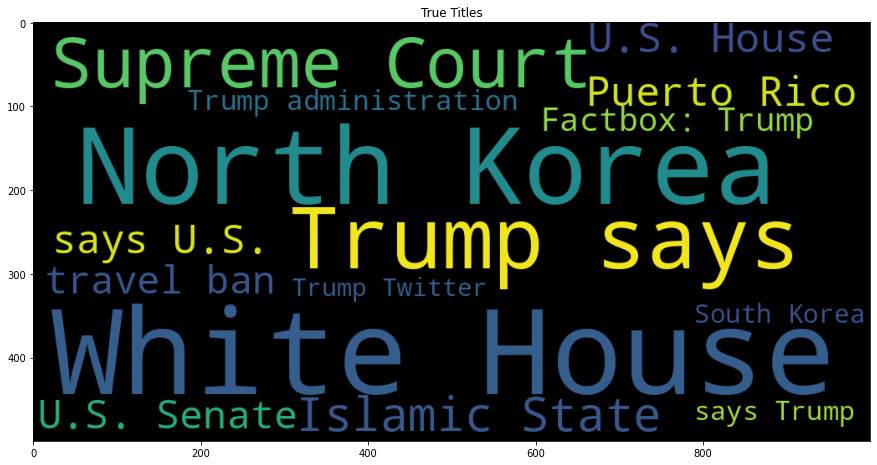

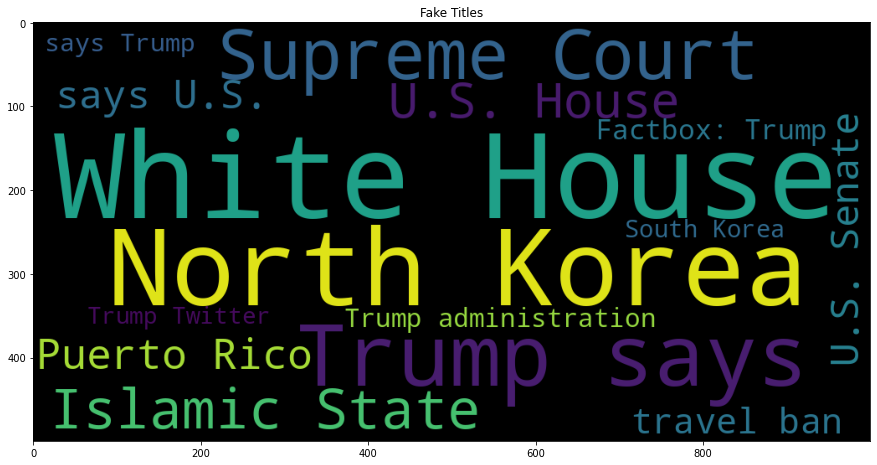

In [5]:
def ex_2a(n, dfSet, txt):

    stop = stopwords.words('english')
    dfFin = dfSet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    title_bigrams = dfFin.apply(lambda row: list(bigrams(row.split(' ')))).tolist()

    title_bigram_count = {}

    for line in title_bigrams:
        for word in line:
            full_word = word[0] + ' ' + word[1]

            if full_word in title_bigram_count:
                title_bigram_count[full_word] += 1
            else:
                title_bigram_count[full_word] = 0
    
    wordcloud = WordCloud(width = 1000, height = 500, max_words=n).generate_from_frequencies(title_bigram_count)

    plt.figure(figsize=(n,8))
    plt.title(txt)
    plt.imshow(wordcloud)
    plt.show()


true_df_A = true.dropna(subset=['title', 'text'])['title'] # drop Nan
ex_2a(15, true_df_A, "True Titles")

false_df_A = true.dropna(subset=['title', 'text'])['title'] # drop Nan
ex_2a(15, false_df_A, "Fake Titles")

### 2.β

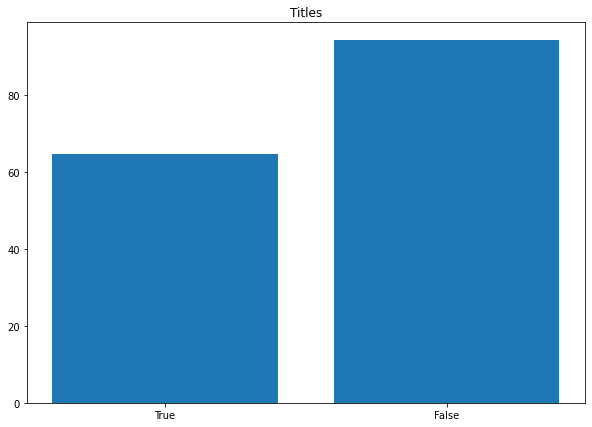

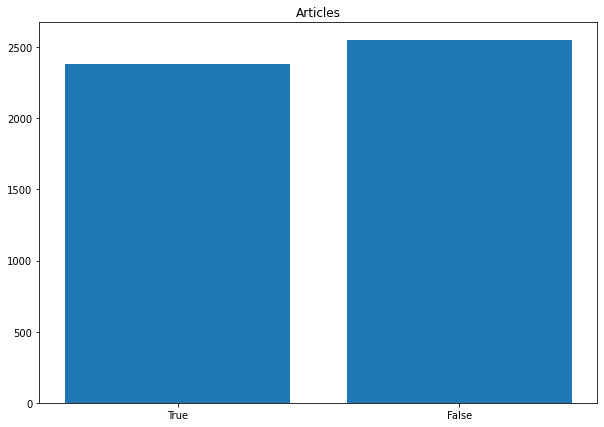

In [ ]:
def ex_2b():

    stop = stopwords.words('english')

    true_df = true.dropna(subset=['title']) # drop Nan
    tcount=0
    for line in true_df['title']:
        tcount = tcount + len(line)

    tfin = tcount/len(true_df)

    false_df = fake.dropna(subset=['title']) # drop Nan
    tcount=0
    for line in false_df['title']:
        tcount = tcount + len(line)

    ffin = tcount/len(false_df)

    data = {'Values': [tfin, ffin]}
    labels= ("True", "False")

    plt.title("Titles")
    plt.bar(labels, data['Values'])
    plt.show()


    #####

    true_df = true.dropna(subset=['text']) # drop Nan
    tcount=0
    for line in true_df['text']:
        tcount = tcount + len(line)

    tfin = tcount/len(true_df)

    false_df = fake.dropna(subset=['text']) # drop Nan
    tcount=0
    for line in false_df['text']:
        tcount = tcount + len(line)

    ffin = tcount/len(false_df)

    data = {'Values': [tfin, ffin]}
    labels= ("True", "False")

    plt.title("Articles")
    plt.bar(labels, data['Values'])
    plt.show()
        
ex_2b()

### 2.γ

Fake titles and texts have more words.

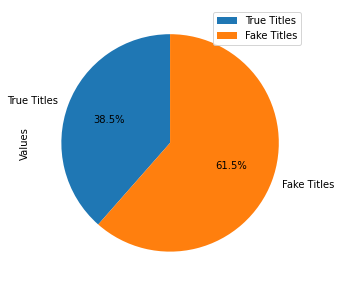

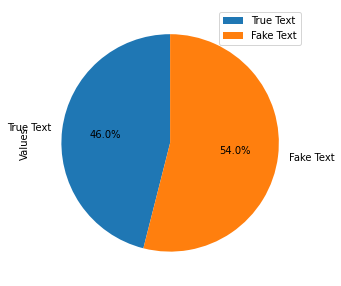

In [ ]:
def ex_2c():

    true_df = true.dropna(subset=['title', 'text']) # drop Nan

    true_title = 0
    true_text = 0

    for row in true_df.iterrows():

        title = row[1]['title']
        true_title += len(title)

        text = row[1]['text']
        true_text += len(text)  

    fake_title = 0
    fake_text = 0

    fake_df = fake.dropna(subset=['title', 'text']) # drop Nan

    for row in fake_df.iterrows():

        title = row[1]['title']
        fake_title += len(title)

        text = row[1]['text']
        fake_text += len(text)

    data = {'Values': [true_title, fake_title]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Titles','Fake Titles'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

    data = {'Values': [true_text, fake_text]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Text','Fake Text'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

ex_2c()

### 2.δ

Fake titles and texts have more words.

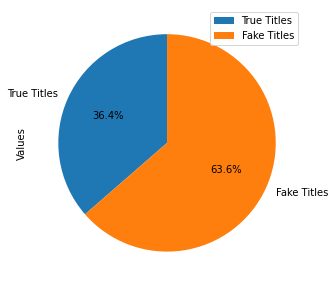

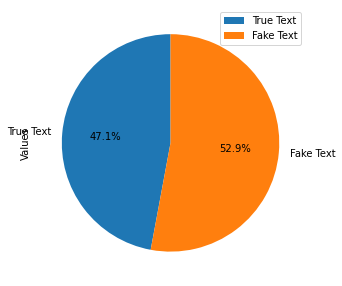

In [ ]:
def ex_2d():

    stop = stopwords.words('english')

    true_df = true.dropna(subset=['title', 'text']) # drop Nan

    true_df['title_no_stopwords'] = true_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    title_list = true_df['title_no_stopwords'].tolist()

    true_df['text_no_stopwords'] = true_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    text_list = true_df['text_no_stopwords'].tolist()

    true_title = 0
    true_text = 0

    for i in title_list:
        true_title += len(i)
    
    for i in text_list:
        true_text += len(i)

    fake_title = 0
    fake_text = 0

    fake_df = fake.dropna(subset=['title', 'text']) # drop Nan
    
    fake_df['title_no_stopwords'] = fake_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    title_list = fake_df['title_no_stopwords'].tolist()

    fake_df['text_no_stopwords'] = fake_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    text_list = fake_df['text_no_stopwords'].tolist()

    for i in title_list:
        fake_title += len(i)

    for i in text_list:
        fake_text += len(i)

    data = {'Values': [true_title, fake_title]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Titles','Fake Titles'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

    data = {'Values': [true_text, fake_text]}
    df = pd.DataFrame(data,columns=['Values'],index = ['True Text','Fake Text'])

    df.plot.pie(y='Values',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
    plt.show()

ex_2d()

### 2.ε

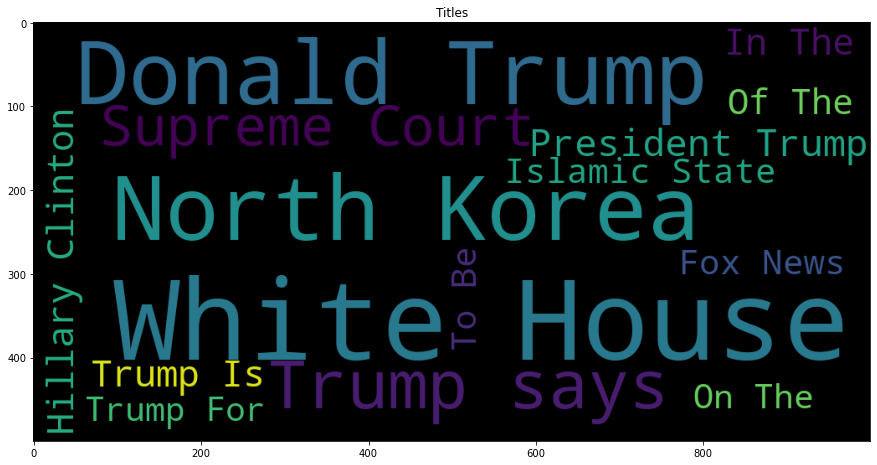

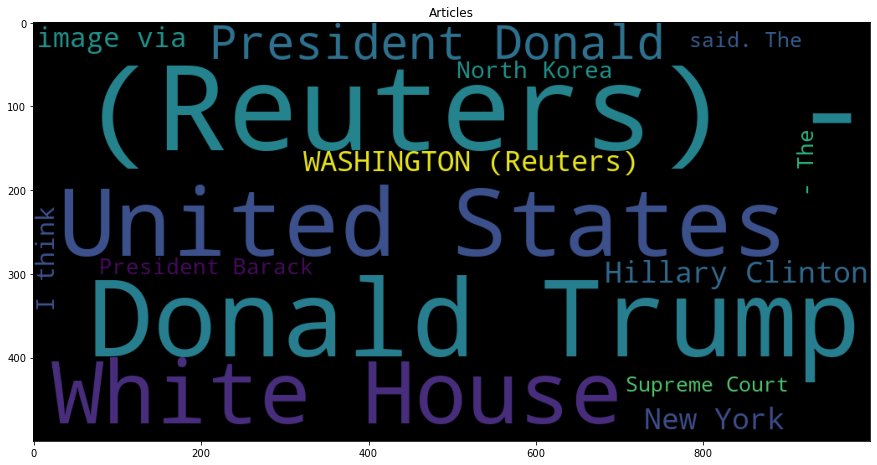

In [6]:
true_df_E = true.dropna(subset=['title', 'text']) # drop Nan

false_df_E = fake.dropna(subset=['title', 'text']) # drop Nan

x= pd.concat([false_df_E, true_df_E])
ex_2a(15, x['title'], "Titles")

ex_2a(15, x['text'], "Articles")

## 3

In [4]:
def ex_e():
    train_df = pd.DataFrame(columns=['title', 'text', 'subject', 'date', 'label'])
    test_df = pd.DataFrame(columns=['title', 'text', 'subject', 'date', 'label'])

    num_of_true_rows = len(true)
    num_of_rows_for_train = num_of_true_rows * 0.8

    true_no_nan = true.dropna(subset=['title', 'text']) # drop Nan
    fake_no_nan = fake.dropna(subset=['title', 'text']) # drop Nan

    for row in true_no_nan.iterrows():

        if num_of_rows_for_train > 0:
            train_df = train_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 1}, ignore_index=True)
            num_of_rows_for_train -= 1
        else:
            test_df = test_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 1}, ignore_index=True)

    num_of_fake_rows = len(fake)
    num_of_rows_for_train = num_of_fake_rows * 0.8

    for row in fake_no_nan.iterrows():

        if num_of_rows_for_train > 0:
            train_df = train_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 0}, ignore_index=True)
            num_of_rows_for_train -= 1
        else:
            test_df = test_df.append({'title': row[1]['title'], 'text': row[1]['text'], 'subject': row[1]['subject'], 'date': row[1]['date'], 'label': 0}, ignore_index=True)

    # This implementation uses 10% of the data provided so the program will run in a normal timeframe
    used=0.1
    train_df_len = len(train_df);
    test_df_len = len(test_df);
    train_df = train_df.sample(n=int(train_df_len * used))
    test_df = test_df.sample(n=int(test_df_len * used))
 
    train_df.to_csv(path+"train.csv")
    test_df.to_csv(path+"test.csv")

ex_e()

## 2

Read the train and test datasets.

In [4]:
def ex_read_train_test():
    train = pd.read_csv(path+"train.csv")
    test = pd.read_csv(path+"test.csv")

    return (train, test)
train_df, test_df = ex_read_train_test()

Get the bag of words.

In [7]:
def ex_get_bow():
    train_text_list = train_df['text'].tolist()
    test_text_list = test_df['text'].tolist()

    # Create a Vectorizer Object
    vectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=2, strip_accents='ascii', max_features=8000)
    
    train_bagsofwords = vectorizer.fit_transform(train_text_list).toarray()
    test_bagsofwords = vectorizer.fit_transform(test_text_list).toarray()
    
    return (train_bagsofwords, test_bagsofwords)

train_bow, test_bow = ex_get_bow()

In [8]:
def ex_get_tfidf():

    train_text_list = train_df['text'].tolist()    
    test_text_list = test_df['text'].tolist()    

    tfIdfV = TfidfVectorizer(use_idf=True, stop_words='english', max_df=0.8, min_df=2, strip_accents='ascii', max_features=5000)

    train_tf_idf = tfIdfV.fit_transform(train_text_list).toarray()
    test_tf_idf = tfIdfV.fit_transform(test_text_list).toarray()

    return (train_tf_idf, test_tf_idf)

train_tf_idf, test_tf_idf = ex_get_tfidf()

In [6]:
def ex_get_word2vec():
    train_tokens = train_df['text'].tolist()
    
    test_tokens = test_df['text']

    train_model_w2v = gensim.models.Word2Vec(train_tokens, size=350, window=10, min_count=2)
    test_model_w2v = gensim.models.Word2Vec(test_tokens, size=350, window=10, min_count=2)

    train_model_w2v.train(train_tokens, total_examples=train_model_w2v.corpus_count, epochs=20)
    test_model_w2v.train(test_tokens, total_examples=test_model_w2v.corpus_count, epochs=20)

    
    train_t= []
    for t in train_df['text']:
        s = []
        for p in t:
            if p in train_model_w2v.wv.vocab:
                s.append(p)
        train_t.append(np.mean(train_model_w2v[s], axis=0))

    test_t= []
    for t in test_df['text']:
        s = []
        for p in t:
            if p in test_model_w2v.wv.vocab:
                s.append(p)
        test_t.append(np.mean(test_model_w2v[s], axis=0))

    return (train_t, test_t)

train_word2vec, test_word2vec = ex_get_word2vec()

<ipython-input-6-f165ab8f4f49>:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  train_t.append(np.mean(train_model_w2v[s], axis=0))
<ipython-input-6-f165ab8f4f49>:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  test_t.append(np.mean(test_model_w2v[s], axis=0))


### Παρατηρούμε ότι όλες οι μετρήσεις που χρησιμοποιούν το F1, έχουν παρόμοιες τιμές. Το ίδιο συμβαίνει και για τις μετρήσεις που χρησιμοποιούν το accuracy. Το accuracy έχει καλύτερα αποτελέσματα σε σχέση με το F1.


In [14]:
def ex_logistic_regression():
    ml_model = LogisticRegression(C = 100, random_state = 0, solver='liblinear')
    ml_model.fit(train_bow, train_df['label'].tolist())

    prediction = ml_model.predict(test_bow)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    ml_model = LogisticRegression(C = 100, random_state = 0, solver='liblinear')
    ml_model.fit(train_tf_idf, train_df['label'].tolist())

    prediction = ml_model.predict(test_tf_idf)
    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("tf_idf F1 score =", f1score * 100, '%')
    print("tf_idf accuracy score =", acc_score * 100, '%')

    ml_model = LogisticRegression(C = 100, random_state = 0, solver='liblinear')
    ml_model.fit(train_word2vec, train_df['label'].tolist())

    prediction = ml_model.predict(test_word2vec)
    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("word2vec F1 score =", f1score * 100, '%')
    print("word2vec accuracy score =", acc_score * 100, '%')

ex_logistic_regression()

bow F1 score = 34.90398613402329 %
bow accuracy score = 50.055741360089186 %
tf_idf F1 score = 35.30225698943135 %
tf_idf accuracy score = 50.50167224080268 %
word2vec F1 score = 33.55366934049705 %
word2vec accuracy score = 49.163879598662206 %


### Οι μετρήσεις με το bow έχουν παρόμοια αποτελέσματα. Το ίδιο συμβαίνει και για αυτές με το tf-idf. Το μοτίβο δεν συνεχίζεται για τις μετρήσεις που χρησιμοποιούν το word2vec, καθώς παρατηρούμε μια διαφορά 15% ανάμεσα στο F1 και στο accuracy.

### Βλέπουμε πως, ο Naive Bayes αλγόριθμος, αποδίδει καλύτερα από το Logistic Regression, για κάθε τιμή. 

In [13]:
def ex_naive_bayes():
    ml_model = GaussianNB()
    ml_model.fit(train_bow, train_df['label'].tolist())

    prediction = ml_model.predict(test_bow)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    ml_model = GaussianNB()
    ml_model.fit(train_tf_idf, train_df['label'].tolist())

    prediction = ml_model.predict(test_tf_idf)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("tf_idf F1 score =", f1score * 100, '%')
    print("tf_idf accuracy score =", acc_score * 100, '%')

    ml_model = GaussianNB()
    ml_model.fit(train_word2vec, train_df['label'].tolist())

    prediction = ml_model.predict(test_word2vec)

    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("word2vec F1 score =", f1score * 100, '%')
    print("word2vec accuracy score =", acc_score * 100, '%')

ex_naive_bayes()

bow F1 score = 50.62508282617798 %
bow accuracy score = 51.17056856187291 %
tf_idf F1 score = 45.431074002190726 %
tf_idf F1 score = 46.599777034559644 %
word2vec F1 score = 34.016835458601626 %
word2vec F1 score = 50.61315496098104 %


### Παρατηρουμε οτι υπαρχουν δυο παραλαγες αλγοριθμων, η πρωτη ειναι ο απλος αλγοριθμος με την χρηση παραμετρων και GridSearchCV ενω η δευτερη ειναι η Linear μορφη του αλγοριθμου.

### Στον πρωτο αλγοριθμο βλεπουμε οτι χρειαζεται πολυ χρονο για να βγαλει πολυ καλα αποτελεσματα ενω στον δευτερο παρατηρουμε οτι βγαζει μετρια αποτελεσματα σε παρα πολυ λιγο χρονο.

In [ ]:
def ex_svm():
    parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters)
    clf.fit(train_bow, train_df['label'].tolist())
    prediction = clf.predict(test_bow)
    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    svc_tfidf = svm.SVC()
    clf_tfidf = GridSearchCV(svc, parameters)
    clf_tfidf.fit(train_tf_idf, train_df['label'].tolist())
    prediction_tfidf = clf_tfidf.predict(test_tf_idf)
    f1score_tfidf = f1_score(test_df['label'].tolist(), prediction_tfidf, average='weighted')
    acc_score_tfidf = accuracy_score(test_df['label'].tolist(), prediction_tfidf)
    
    print("tfidf F1 score =", f1score_tfidf * 100, '%')
    print("tfidf accuracy score =", acc_score_tfidf * 100, '%')



    svc_w2v = svm.SVC()
    clf_w2v = GridSearchCV(svc, parameters)
    clf_w2v.fit(train_word2vec, train_df['label'].tolist())
    prediction_w2v = clf_w2v.predict(test_word2vec)
    f1score_w2v = f1_score(test_df['label'].tolist(), prediction_w2v, average='weighted')
    acc_score_w2v = accuracy_score(test_df['label'].tolist(), prediction_w2v)
    
    print("w2v F1 score =", f1score_w2v * 100, '%')
    print("w2v accuracy score =", acc_score_w2v * 100, '%')

ex_svm()

In [9]:
def ex_svm_linear():
    linclf = svm.LinearSVC()
    linclf.fit(train_bow, train_df['label'].tolist())
    prediction = linclf.predict(test_bow)
    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    linclf_tfidf = svm.LinearSVC()
    linclf_tfidf.fit(train_tf_idf, train_df['label'].tolist())
    prediction_tfidf = linclf_tfidf.predict(test_tf_idf)
    f1score_tfidf = f1_score(test_df['label'].tolist(), prediction_tfidf, average='weighted')
    acc_score_tfidf = accuracy_score(test_df['label'].tolist(), prediction_tfidf)

    print("tfidf F1 score =", f1score_tfidf * 100, '%')
    print("tfidf accuracy score =", acc_score_tfidf * 100, '%')



    linclf_w2v = svm.LinearSVC()
    linclf_w2v.fit(train_word2vec, train_df['label'].tolist())
    prediction_w2v = linclf_w2v.predict(test_word2vec)
    f1score_w2v = f1_score(test_df['label'].tolist(), prediction_w2v, average='weighted')
    acc_score_w2v = accuracy_score(test_df['label'].tolist(), prediction_w2v)

    print("w2v F1 score =", f1score_w2v * 100, '%')
    print("w2v accuracy score =", acc_score_w2v * 100, '%')

ex_svm_linear()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


bow F1 score = 36.55243999433368 %
bow accuracy score = 51.50501672240802 %
tfidf F1 score = 35.98635464876258 %
tfidf accuracy score = 50.72463768115942 %
w2v F1 score = 33.69956866563826 %
w2v accuracy score = 49.609810479375696 %


### Για τον αλγοριθμο random forests τα αποτελεσματα ειναι μετρια προς κακα και ειναι παρομοια και στα 3, bow tfidf και w2v. Αξιζει να σημειωθει πως χωρις καποιο ειδος αφαιρεσης stopwords κλπ, τα αποτελεσματα δεν ειναι καθολου ικανοποιητικα.

In [ ]:
def ex_random_forests():
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(train_bow, train_df['label'].tolist())
    prediction = clf.predict(test_bow)
    f1score = f1_score(test_df['label'].tolist(), prediction, average='weighted')
    acc_score = accuracy_score(test_df['label'].tolist(), prediction)

    print("bow F1 score =", f1score * 100, '%')
    print("bow accuracy score =", acc_score * 100, '%')

    clf_tfidf = RandomForestClassifier(max_depth=2, random_state=0)
    clf_tfidf.fit(train_tf_idf, train_df['label'].tolist())
    prediction_tfidf = clf_tfidf.predict(test_tf_idf)
    f1score_tfidf = f1_score(test_df['label'].tolist(), prediction_tfidf, average='weighted')
    acc_score_tfidf = accuracy_score(test_df['label'].tolist(), prediction_tfidf)

    print("tfidf F1 score =", f1score_tfidf * 100, '%')
    print("tfidf accuracy score =", acc_score_tfidf * 100, '%')



    clf_w2v = RandomForestClassifier(max_depth=2, random_state=0)
    clf_w2v.fit(train_word2vec, train_df['label'].tolist())
    prediction_w2v = clf_w2v.predict(test_word2vec)
    f1score_w2v = f1_score(test_df['label'].tolist(), prediction_w2v, average='weighted')
    acc_score_w2v = accuracy_score(test_df['label'].tolist(), prediction_w2v)

    print("w2v F1 score =", f1score_w2v * 100, '%')
    print("w2v accuracy score =", acc_score_w2v * 100, '%')
ex_random_forests()

bow F1 score = 35.144763591055145 %
bow accuracy score = 51.616499442586395 %
bow F1 score = 39.03096494557565 %
bow accuracy score = 52.17391304347826 %
